In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = r"C:\Users\kaust\Desktop\PG\SEM_2\DA&DM\DA Project\archive\train.csv"
train_data = pd.read_csv(train_path)
test_path = r"C:\Users\kaust\Desktop\PG\SEM_2\DA&DM\DA Project\archive\test.csv"
test_data = pd.read_csv(test_path)

In [3]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train_data.shape

(233154, 41)

In [5]:
test_data.shape

(112392, 40)

In [6]:
test_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

UniqueID = It is provided to every customer so its Unique and will always be different 

MobileNo_Avl_Flag = Whether person provided Mobile No. Doesn't tell us if loan will default

Current_pincode_ID = It is Customers address we don't need that for Prediction

Employee_code_ID = Employee ID is not required as it doesn't related with Loan_defualt

NO_OF_INQUIRIES = No. of Inquiries to loan doesn't help us to determine wheather loan will default or not

State_ID = It is where loan is availed and doesn't add much to prediction to loan default

branch_id = Branch ID isn't relevent to Data Processing

manufacturer_id = Manufacturer ID doesn't add much too data

supplier_id = Supplier ID doesn't add much too data

### So we drop these

In [8]:
train_data.drop(columns=['UniqueID','MobileNo_Avl_Flag','Current_pincode_ID','Employee_code_ID','NO.OF_INQUIRIES','State_ID','branch_id','manufacturer_id','supplier_id'], inplace=True)  
test_data.drop(columns=['UniqueID','MobileNo_Avl_Flag','Current_pincode_ID','Employee_code_ID','NO.OF_INQUIRIES','State_ID','branch_id','manufacturer_id','supplier_id'], inplace=True)  

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00
PAN_flag,233154.0,0.075577,2.643201e-01,0.00,0.00,0.0,0.00,1.000000e+00
VoterID_flag,233154.0,0.144943,3.520439e-01,0.00,0.00,0.0,0.00,1.000000e+00
Driving_flag,233154.0,0.023242,1.506720e-01,0.00,0.00,0.0,0.00,1.000000e+00
Passport_flag,233154.0,0.002127,4.607421e-02,0.00,0.00,0.0,0.00,1.000000e+00
PERFORM_CNS.SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PRI.NO.OF.ACCTS,233154.0,2.440636,5.217233e+00,0.00,0.00,0.0,3.00,4.530000e+02


In [10]:
train_data.columns = train_data.columns.str.replace('.','_')
test_data.columns = test_data.columns.str.replace('.','_')

In [11]:
train_data.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE             

## There are 7661 null values in the Employment Type attribute so we need to fix that by either imputation or dropping them
But first we need to deal with the categorical (Object) variables

In [12]:
#Now we have 2 Columns named "AVERAGE_ACCT_AGE" & "CREDIT_HISTORY_LENGTH".
#They have AplhNumeric Values Lets change them to Months

# Function to convert 'X yrs Y mon' format to total months
def change_col_month(col):
    try:
        col = str(col).strip()  # Ensure the value is a string and strip spaces
        
        if 'yrs' in col and 'mon' in col:  # Case: "5 yrs 6 mon"
            year, month = col.split()
            year = int(year.replace('yrs', '').strip())  # Extract year
            month = int(month.replace('mon', '').strip())  # Extract month
        
        elif 'yrs' in col:  # Case: Only years present (e.g., "4 yrs")
            year = int(col.replace('yrs', '').strip())
            month = 0  # No months given
        
        else:  # Case: Only months present (e.g., "8 mon")
            year = 0
            month = int(col.replace('mon', '').strip())
        
        return year * 12 + month  # Convert to total months
    
    except:
        return 0  # Return 0 if there's an unexpected error

# Function to apply transformation
def months_transformation(data):
    data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].astype(str).apply(change_col_month)
    data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].astype(str).apply(change_col_month)

# Apply transformation
months_transformation(train_data)
months_transformation(test_data)


## Converted year months alpha numeric data to number of months (Numeric)

In [13]:
train_data.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default
0,50578,58400,89.55,01-01-84,Salaried,03-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,31-07-85,Self employed,26-09-18,1,0,0,0,...,0,0,0,1991,0,0,1,23,23,1
2,53278,61360,89.63,24-08-85,Self employed,01-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,30-12-93,Self employed,26-10-18,1,0,0,0,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39,09-12-77,Self employed,26-09-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Now we deal with PERFORM_CNS.SCORE.DESCRIPTION 

In [14]:

train_data.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [15]:
def transform_PERFORM_CNS_SCORE_DESCRIPTION(data):
   
    # Replacing all the values into a common group
    replace_map = {
        'C-Very Low Risk': 'Very Low Risk', 'A-Very Low Risk': 'Very Low Risk', 
        'D-Very Low Risk': 'Very Low Risk', 'B-Very Low Risk': 'Very Low Risk',
        'M-Very High Risk': 'Very High Risk', 'L-Very High Risk': 'Very High Risk',
        'F-Low Risk': 'Low Risk', 'E-Low Risk': 'Low Risk', 'G-Low Risk': 'Low Risk',
        'H-Medium Risk': 'Medium Risk', 'I-Medium Risk': 'Medium Risk',
        'J-High Risk': 'High Risk', 'K-High Risk': 'High Risk'
    }
    data['PERFORM_CNS_SCORE_DESCRIPTION'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].replace(replace_map)

    # Mapping to numerical values
    risk_map = {
        'No Bureau History Available': -1, 'Not Scored: No Activity seen on the customer (Inactive)': -1,
        'Not Scored: Sufficient History Not Available': -1, 'Not Scored: No Updates available in last 36 months': -1,
        'Not Scored: Only a Guarantor': -1, 'Not Scored: More than 50 active Accounts found': -1,
        'Not Scored: Not Enough Info available on the customer': -1,
        'Very Low Risk': 4, 'Low Risk': 3, 'Medium Risk': 2, 'High Risk': 1, 'Very High Risk': 0
    }

    data['PERFORM_CNS_SCORE_DESCRIPTION'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].map(risk_map)

# Call function
transform_PERFORM_CNS_SCORE_DESCRIPTION(train_data)
transform_PERFORM_CNS_SCORE_DESCRIPTION(test_data)

<Axes: xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

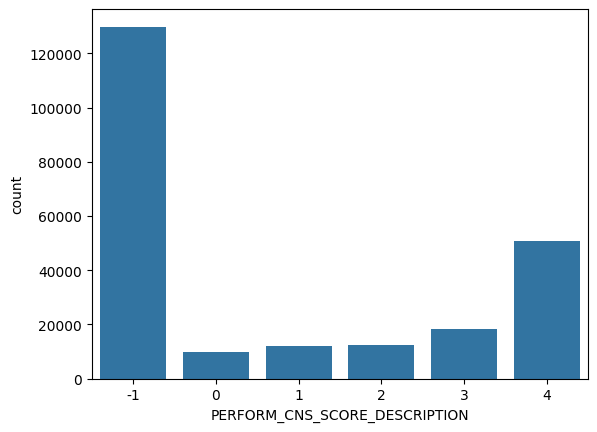

In [16]:
sns.countplot(x = train_data['PERFORM_CNS_SCORE_DESCRIPTION'])

## Transforming Primary and Secondary Accounts

In [17]:
train_data['NO_OF_ACCTS'] = train_data['PRI_NO_OF_ACCTS'] + train_data['SEC_NO_OF_ACCTS']
train_data['ACTIVE_ACCTS'] = train_data['PRI_ACTIVE_ACCTS'] + train_data['SEC_ACTIVE_ACCTS']
train_data['OVERDUE_ACCTS'] = train_data['PRI_OVERDUE_ACCTS'] + train_data['SEC_OVERDUE_ACCTS']
train_data['CURRENT_BALANCE'] = train_data['PRI_CURRENT_BALANCE'] + train_data['SEC_CURRENT_BALANCE']
train_data['SANCTIONED_AMOUNT'] = train_data['PRI_SANCTIONED_AMOUNT'] + train_data['SEC_SANCTIONED_AMOUNT']
train_data['DISBURSED_AMOUNT'] = train_data['PRI_DISBURSED_AMOUNT'] + train_data['SEC_DISBURSED_AMOUNT']
train_data['INSTAL_AMT'] = train_data['PRIMARY_INSTAL_AMT'] + train_data['SEC_SANCTIONED_AMOUNT']

test_data['NO_OF_ACCTS'] = test_data['PRI_NO_OF_ACCTS'] + test_data['SEC_NO_OF_ACCTS']
test_data['ACTIVE_ACCTS'] = test_data['PRI_ACTIVE_ACCTS'] + test_data['SEC_ACTIVE_ACCTS']
test_data['OVERDUE_ACCTS'] = test_data['PRI_OVERDUE_ACCTS'] + test_data['SEC_OVERDUE_ACCTS']
test_data['CURRENT_BALANCE'] = test_data['PRI_CURRENT_BALANCE'] + test_data['SEC_CURRENT_BALANCE']
test_data['SANCTIONED_AMOUNT'] = test_data['PRI_SANCTIONED_AMOUNT'] + test_data['SEC_SANCTIONED_AMOUNT']
test_data['DISBURSED_AMOUNT'] = test_data['PRI_DISBURSED_AMOUNT'] + test_data['SEC_DISBURSED_AMOUNT']
test_data['INSTAL_AMT'] = test_data['PRIMARY_INSTAL_AMT'] + test_data['SEC_SANCTIONED_AMOUNT']

# List of original columns to drop
original_columns = [
    'PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS', 
    'PRI_ACTIVE_ACCTS', 'SEC_ACTIVE_ACCTS', 
    'PRI_OVERDUE_ACCTS', 'SEC_OVERDUE_ACCTS', 
    'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 
    'PRI_SANCTIONED_AMOUNT', 'SEC_SANCTIONED_AMOUNT', 
    'PRI_DISBURSED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 
    'PRIMARY_INSTAL_AMT'
]

# Dropping the original columns from both datasets
train_data.drop(columns=original_columns, inplace=True, errors='ignore')
test_data.drop(columns=original_columns, inplace=True, errors='ignore')

In [18]:
new_columns = ['NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
       'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT']

for i in new_columns:
    print(i,":", train_data[i].nunique())
    print("")

NO_OF_ACCTS : 108

ACTIVE_ACCTS : 41

OVERDUE_ACCTS : 22

CURRENT_BALANCE : 72483

SANCTIONED_AMOUNT : 45367

DISBURSED_AMOUNT : 48958

INSTAL_AMT : 30049



<Axes: ylabel='ACTIVE_ACCTS'>

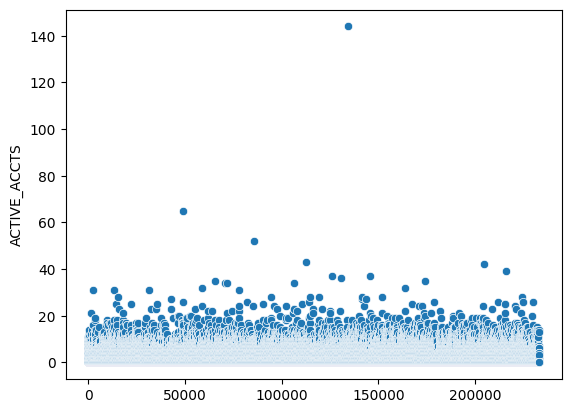

In [19]:
sns.scatterplot(data=train_data['ACTIVE_ACCTS'])

<Axes: ylabel='NO_OF_ACCTS'>

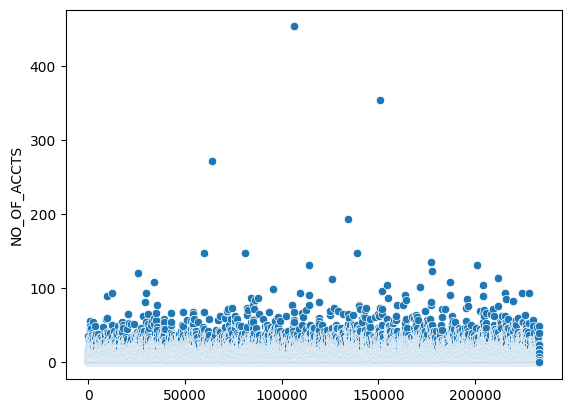

In [20]:
sns.scatterplot(data=train_data['NO_OF_ACCTS'])

<Axes: ylabel='OVERDUE_ACCTS'>

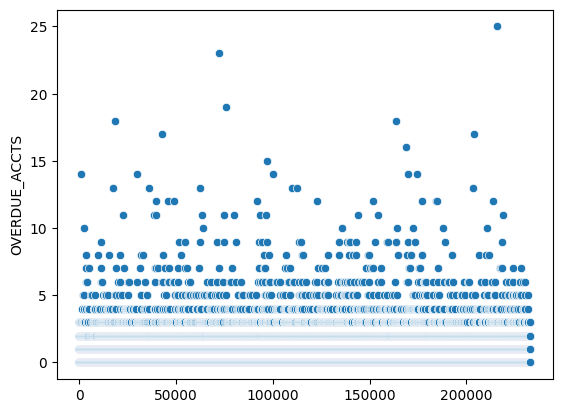

In [21]:
sns.scatterplot(data=train_data['OVERDUE_ACCTS'])

<Axes: ylabel='CURRENT_BALANCE'>

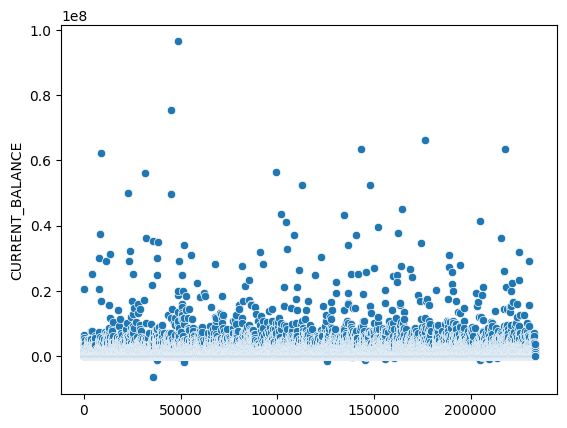

In [22]:
sns.scatterplot(data = train_data['CURRENT_BALANCE'])

In [23]:
def mode_impute_outlier(data):
    # Handle ACTIVE_ACCTS outliers
    li = list(data['ACTIVE_ACCTS'].sort_values()[-3:].index)
    mode_value = data.drop(li)['ACTIVE_ACCTS'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'ACTIVE_ACCTS'] = mode_value  # Impute using .loc
    
    # Handle NO_OF_ACCTS outliers
    li = list(data['NO_OF_ACCTS'].sort_values()[-4:].index)
    mode_value = data.drop(li)['NO_OF_ACCTS'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'NO_OF_ACCTS'] = mode_value  # Impute using .loc
    
    # Handle OVERDUE_ACCTS outliers
    li = list(data['OVERDUE_ACCTS'].sort_values()[-10:].index)
    mode_value = data.drop(li)['OVERDUE_ACCTS'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'OVERDUE_ACCTS'] = mode_value  # Impute using .loc
    
    # Handle CURRENT_BALANCE outliers
    li = list(data['CURRENT_BALANCE'].sort_values()[-15:].index)
    mode_value = data.drop(li)['CURRENT_BALANCE'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'CURRENT_BALANCE'] = mode_value  # Impute using .loc

# Apply function
mode_impute_outlier(train_data)
train_data.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT
0,50578,58400,89.55,01-01-84,Salaried,03-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,31-07-85,Self employed,26-09-18,1,0,0,0,...,23,23,1,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63,24-08-85,Self employed,01-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,30-12-93,Self employed,26-10-18,1,0,0,0,...,8,15,1,3,0,0,0,0,0,31
4,52378,60300,88.39,09-12-77,Self employed,26-09-18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## lets convert the DOB and Disbursement Date to age

In [24]:
train_data.Date_of_Birth.min(), train_data.Date_of_Birth.max()

('01-01-00', '31-12-99')

In [25]:
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900


def calculate_age(data):
    data['Date_of_Birth'] = data['Date_of_Birth'].apply(age)
    data['DisbursalDate'] = data['DisbursalDate'].apply(age)
    # Age of applicant when he/she applied for Loan
    data['Age'] = data['DisbursalDate'] - data['Date_of_Birth']
    
calculate_age(train_data)
calculate_age(test_data)

date_columns = [
    'Date_of_Birth', 'DisbursalDate']
train_data.drop(columns=date_columns, inplace=True, errors='ignore')
test_data.drop(columns=date_columns, inplace=True, errors='ignore')

In [26]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00
PAN_flag,233154.0,0.075577,2.643201e-01,0.00,0.00,0.0,0.00,1.000000e+00
VoterID_flag,233154.0,0.144943,3.520439e-01,0.00,0.00,0.0,0.00,1.000000e+00
Driving_flag,233154.0,0.023242,1.506720e-01,0.00,0.00,0.0,0.00,1.000000e+00
Passport_flag,233154.0,0.002127,4.607421e-02,0.00,0.00,0.0,0.00,1.000000e+00
PERFORM_CNS_SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PERFORM_CNS_SCORE_DESCRIPTION,233154.0,0.707078,2.123337e+00,-1.00,-1.00,-1.0,3.00,4.000000e+00


## Now lets deal with the missing value

<Axes: xlabel='Employment_Type', ylabel='count'>

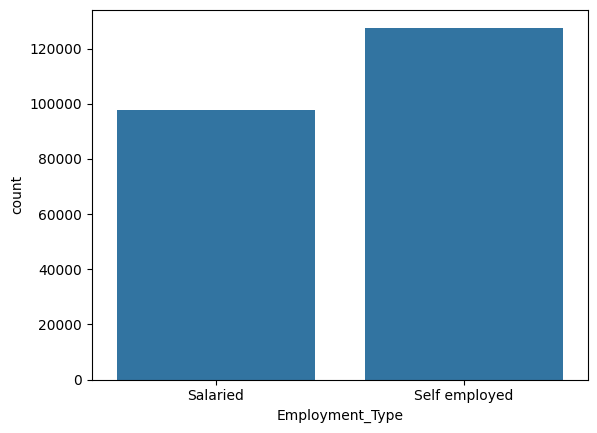

In [27]:
sns.countplot(x = train_data['Employment_Type'])

In [28]:
train_data['Employment_Type'] = train_data['Employment_Type'].map({'Salaried': 1, 'Self employed': 0})
test_data['Employment_Type'] = test_data['Employment_Type'].map({'Salaried': 1, 'Self employed': 0})
train_data['Employment_Type'].isnull().sum()

np.int64(7661)

In [29]:
correlation_values = train_data.corr()['Employment_Type'].dropna().sort_values(ascending=False)
print(correlation_values)

Employment_Type                        1.000000
ltv                                    0.107451
Aadhar_flag                            0.087472
PERFORM_CNS_SCORE_DESCRIPTION          0.050634
PERFORM_CNS_SCORE                      0.044901
disbursed_amount                       0.020152
ACTIVE_ACCTS                           0.009703
NEW_ACCTS_IN_LAST_SIX_MONTHS           0.009426
CREDIT_HISTORY_LENGTH                  0.008913
SEC_INSTAL_AMT                         0.005387
Passport_flag                          0.005197
AVERAGE_ACCT_AGE                       0.000232
Driving_flag                          -0.002521
PAN_flag                              -0.003008
NO_OF_ACCTS                           -0.004971
INSTAL_AMT                            -0.006895
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS   -0.007327
SANCTIONED_AMOUNT                     -0.012065
DISBURSED_AMOUNT                      -0.012313
CURRENT_BALANCE                       -0.020165
OVERDUE_ACCTS                         -0

## There is no good corelation between Employment type and any other column so we just impute missing values with 0

In [30]:
train_data['Employment_Type'] = train_data['Employment_Type'].fillna(0)
test_data['Employment_Type'] = test_data['Employment_Type'].fillna(0)

In [31]:
train_data.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Employment_Type                        0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
SEC_INSTAL_AMT                         0
NEW_ACCTS_IN_LAST_SIX_MONTHS           0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0
AVERAGE_ACCT_AGE                       0
CREDIT_HISTORY_LENGTH                  0
loan_default                           0
NO_OF_ACCTS                            0
ACTIVE_ACCTS                           0
OVERDUE_ACCTS                          0
CURRENT_BALANCE                        0
SANCTIONED_AMOUNT                      0
DISBURSED_AMOUNT                       0
INSTAL_AMT                             0
Age             

## Data is now clean and could be used for model training

In [32]:
X = train_data.drop(['loan_default'], axis=1)
y = train_data['loan_default']

X.head()

,disbursed_amount,asset_cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,...,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT,Age
0,50578,58400,89.55,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,0.0,1,0,0,0,0,598,...,23,23,1,1,1,27600,50200,50200,1991,33
2,53278,61360,89.63,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,0.0,1,0,0,0,0,305,...,8,15,3,0,0,0,0,0,31,25
4,52378,60300,88.39,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41


C:\Users\kaust\AppData\Local\Temp\ipykernel_16048\3704471061.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_data['loan_default'], palette=['#1f77b4', '#ff7f0e'], edgecolor='black')


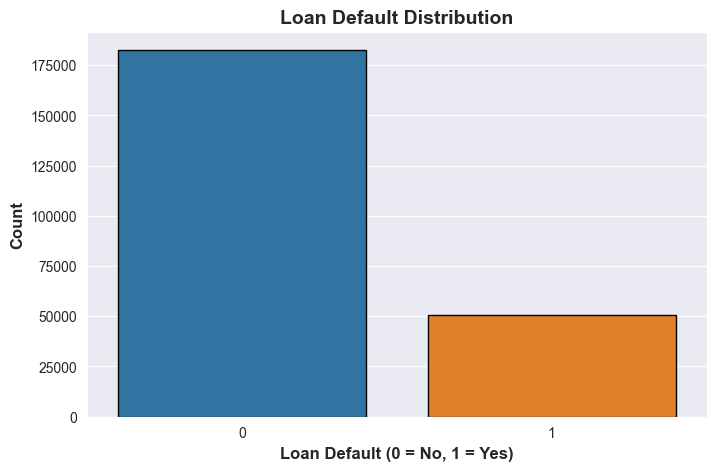

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# Customizing the count plot
ax = sns.countplot(x=train_data['loan_default'], palette=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Adding labels
plt.xlabel('Loan Default (0 = No, 1 = Yes)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Loan Default Distribution', fontsize=14, fontweight='bold')

# Annotating bars with counts


# Show the plot
plt.show()


## The standard where data imbalance can be ignore in Binary class data is 65-35. In our case it is 72-28, so we cant't ignore it and have to deal with it using SMOTE

In [34]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek()
X_tf, y_tf = smote_tomek.fit_resample(X, y)
X_tf.shape, y_tf.shape

((334190, 24), (334190,))

C:\Users\kaust\AppData\Local\Temp\ipykernel_16048\4261088623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_tf, palette=['#1f77b4', '#ff7f0e'], edgecolor='black')


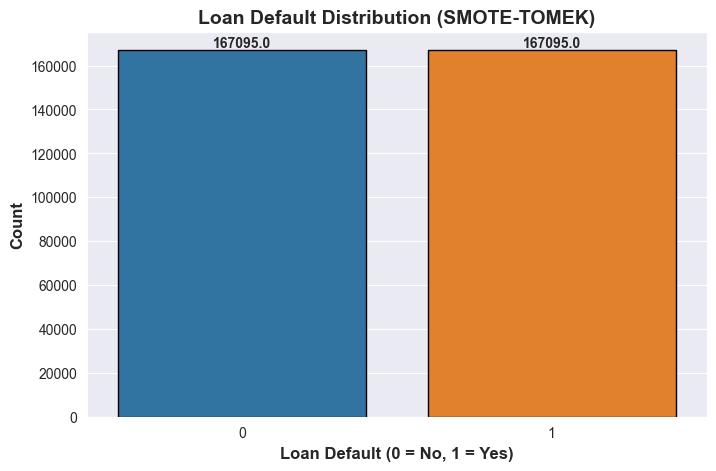

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))  # Match size to the first chart

# Customizing the count plot with colors and edge
ax = sns.countplot(x=y_tf, palette=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Add labels and title with bold font
plt.xlabel('Loan Default (0 = No, 1 = Yes)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Loan Default Distribution (SMOTE-TOMEK)', fontsize=14, fontweight='bold')

# Annotating bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


                                     disbursed_amount  asset_cost       ltv  \
disbursed_amount                             1.000000    0.763034  0.342684   
asset_cost                                   0.763034    1.000000 -0.321548   
ltv                                          0.342684   -0.321548  1.000000   
Employment_Type                              0.006716   -0.076719  0.121018   
Aadhar_flag                                 -0.035543   -0.109675  0.106464   
PAN_flag                                     0.002450    0.041537 -0.049453   
VoterID_flag                                -0.000308    0.078904 -0.113259   
Driving_flag                                -0.006758    0.015161 -0.030131   
Passport_flag                                0.004022    0.004122  0.000229   
PERFORM_CNS_SCORE                            0.004176   -0.047858  0.076938   
PERFORM_CNS_SCORE_DESCRIPTION               -0.002159   -0.046631  0.064783   
SEC_INSTAL_AMT                              -0.00607

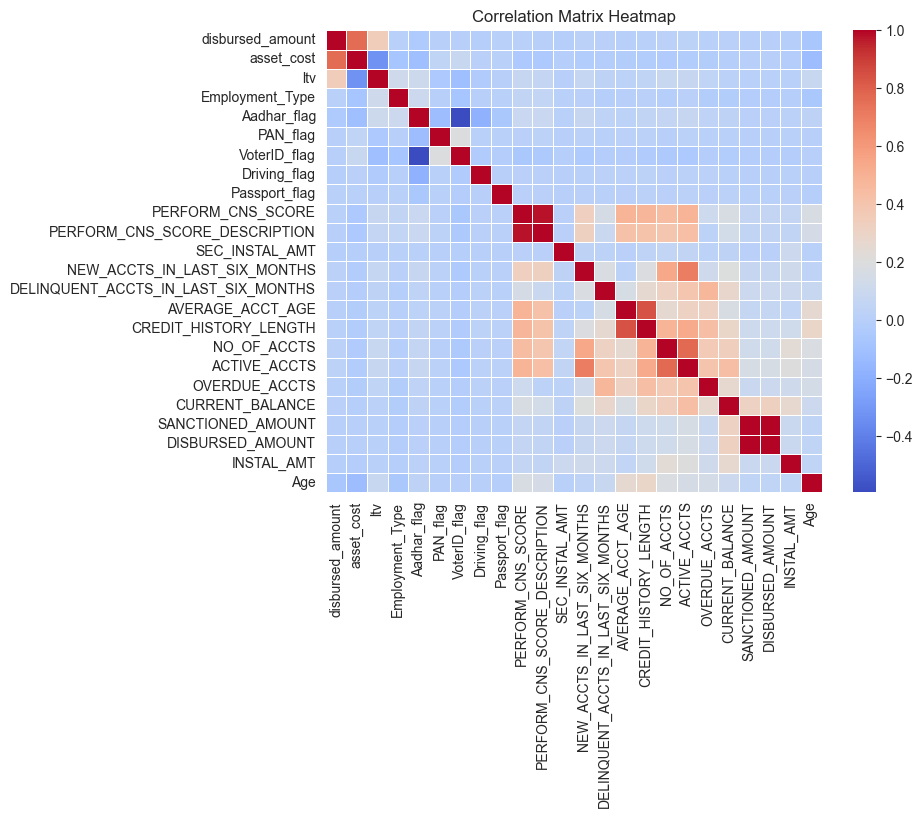

In [36]:
corr_matrix = pd.DataFrame(X_tf).corr()

print(corr_matrix)
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
# Compute correlation matrix
correlation_matrix = np.corrcoef(X_tf, rowvar=False)

# Compute Variance Inflation Factor (VIF)
vif = np.linalg.inv(correlation_matrix).diagonal()

# Print VIF values for each feature
for i, v in enumerate(vif):
    print(f'VIF for feature {i}: {v:.4f}')

VIF for feature 0: 31.1945
VIF for feature 1: 30.7370
VIF for feature 2: 14.5437
VIF for feature 3: 1.0351
VIF for feature 4: 1.7028
VIF for feature 5: 1.0458
VIF for feature 6: 1.6585
VIF for feature 7: 1.0728
VIF for feature 8: 1.0079
VIF for feature 9: 30.3351
VIF for feature 10: 27.6677
VIF for feature 11: 1.0120
VIF for feature 12: 2.3332
VIF for feature 13: 1.4161
VIF for feature 14: 4.3682
VIF for feature 15: 5.1792
VIF for feature 16: 2.7817
VIF for feature 17: 4.8692
VIF for feature 18: 1.7120
VIF for feature 19: 1.4519
VIF for feature 20: 745.0601
VIF for feature 21: 745.8113
VIF for feature 22: 1.1187
VIF for feature 23: 1.1214


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42, stratify=y_tf)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train.shape

(267352, 24)

In [40]:
X_test.shape

(66838, 24)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# Train Results
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("\n===== Train Results =====")
print(f'Accuracy: {train_accuracy:.4f}')
print('Confusion Matrix:\n', train_conf_matrix)
print('Classification Report:\n', train_class_report)

# Test Results
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("===== Test Results =====")
print(f'Accuracy: {test_accuracy:.4f}')
print('Confusion Matrix:\n', test_conf_matrix)
print('Classification Report:\n', test_class_report)


===== Train Results =====
Accuracy: 0.6765
Confusion Matrix:
 [[93625 40051]
 [46442 87234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68    133676
           1       0.69      0.65      0.67    133676

    accuracy                           0.68    267352
   macro avg       0.68      0.68      0.68    267352
weighted avg       0.68      0.68      0.68    267352

===== Test Results =====
Accuracy: 0.6768
Confusion Matrix:
 [[23363 10056]
 [11546 21873]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68     33419
           1       0.69      0.65      0.67     33419

    accuracy                           0.68     66838
   macro avg       0.68      0.68      0.68     66838
weighted avg       0.68      0.68      0.68     66838



In [42]:
import statsmodels.api as sm

import statsmodels.discrete.discrete_model as sml
X=X_train
X = sm.add_constant(X)
logit = sml.Logit(y_train, X_train).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.576820
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               267352
Model:                          Logit   Df Residuals:                   267328
Method:                           MLE   Df Model:                           23
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.1678
Time:                        20:13:35   Log-Likelihood:            -1.5421e+05
converged:                       True   LL-Null:                   -1.8531e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1624      0.025     -6.485      0.000      -0.211      -0.113
x2             0.2634      0.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Train Results
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("\n===== Train Results =====")
print(f'Accuracy: {train_accuracy:.4f}')
print('Confusion Matrix:\n', train_conf_matrix)
print('Classification Report:\n', train_class_report)

# Test Results
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("===== Test Results =====")
print(f'Accuracy: {test_accuracy:.4f}')
print('Confusion Matrix:\n', test_conf_matrix)
print('Classification Report:\n', test_class_report)

C:\Users\kaust\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== Train Results =====
Accuracy: 0.7754
Confusion Matrix:
 [[124249   9427]
 [ 50610  83066]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81    133676
           1       0.90      0.62      0.73    133676

    accuracy                           0.78    267352
   macro avg       0.80      0.78      0.77    267352
weighted avg       0.80      0.78      0.77    267352

===== Test Results =====
Accuracy: 0.7705
Confusion Matrix:
 [[30829  2590]
 [12746 20673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80     33419
           1       0.89      0.62      0.73     33419

    accuracy                           0.77     66838
   macro avg       0.80      0.77      0.77     66838
weighted avg       0.80      0.77      0.77     66838



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)


# Train Results
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("\n===== Train Results =====")
print(f'Accuracy: {train_accuracy:.4f}')
print('Confusion Matrix:\n', train_conf_matrix)
print('Classification Report:\n', train_class_report)

# Test Results
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("===== Test Results =====")
print(f'Accuracy: {test_accuracy:.4f}')
print('Confusion Matrix:\n', test_conf_matrix)
print('Classification Report:\n', test_class_report)



===== Train Results =====
Accuracy: 0.7417
Confusion Matrix:
 [[126727   6949]
 [ 62110  71566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.79    133676
           1       0.91      0.54      0.67    133676

    accuracy                           0.74    267352
   macro avg       0.79      0.74      0.73    267352
weighted avg       0.79      0.74      0.73    267352

===== Test Results =====
Accuracy: 0.7368
Confusion Matrix:
 [[31519  1900]
 [15690 17729]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78     33419
           1       0.90      0.53      0.67     33419

    accuracy                           0.74     66838
   macro avg       0.79      0.74      0.73     66838
weighted avg       0.79      0.74      0.73     66838



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
rf_model = RandomForestClassifier(
    n_estimators=1500,
    n_jobs=-1,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf_model.fit(X_train, y_train)

# --- Train Evaluation ---
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('\nTrain Results:')
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print('\nTrain Classification Report:')
print(classification_report(y_train, y_train_pred))
print('\nTrain Confusion Matrix:')
print(confusion_matrix(y_train, y_train_pred))

# --- Test Evaluation ---
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('\nTest Results:')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print('\nTest Classification Report:')
print(classification_report(y_test, y_test_pred))
print('\nTest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))


Train Results:
Train Accuracy: 79.25%

Train Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81    133724
           1       0.87      0.69      0.77    133725

    accuracy                           0.79    267449
   macro avg       0.81      0.79      0.79    267449
weighted avg       0.81      0.79      0.79    267449


Train Confusion Matrix:
[[120311  13413]
 [ 42080  91645]]

Test Results:
Test Accuracy: 77.06%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79     33432
           1       0.85      0.66      0.74     33431

    accuracy                           0.77     66863
   macro avg       0.79      0.77      0.77     66863
weighted avg       0.79      0.77      0.77     66863


Test Confusion Matrix:
[[29621  3811]
 [11528 21903]]


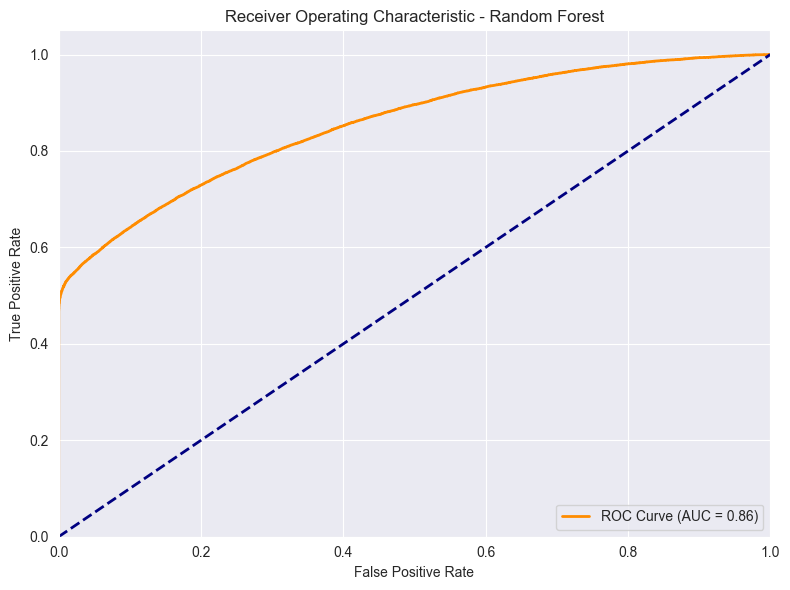

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_test_probs = rf_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
print("Feature Importance Ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1:2d}) {X_tf.columns[idx]:<30} {importances[idx]:.6f}")


Feature Importance Ranking:
 1) Employment_Type                0.327215
 2) Aadhar_flag                    0.085482
 3) PERFORM_CNS_SCORE_DESCRIPTION  0.084921
 4) VoterID_flag                   0.074786
 5) PERFORM_CNS_SCORE              0.065211
 6) ltv                            0.060139
 7) disbursed_amount               0.039687
 8) INSTAL_AMT                     0.029065
 9) Age                            0.024786
10) asset_cost                     0.024238
11) Driving_flag                   0.022725
12) PAN_flag                       0.021416
13) SANCTIONED_AMOUNT              0.019305
14) DISBURSED_AMOUNT               0.019051
15) CREDIT_HISTORY_LENGTH          0.017844
16) CURRENT_BALANCE                0.017608
17) NO_OF_ACCTS                    0.017382
18) AVERAGE_ACCT_AGE               0.014165
19) ACTIVE_ACCTS                   0.011326
20) NEW_ACCTS_IN_LAST_SIX_MONTHS   0.008313
21) OVERDUE_ACCTS                  0.008093
22) DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS 0.004166

In [48]:
from sklearn.metrics import roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC Score: {auc_score:.4f}')


AUC-ROC Score: 0.8550


In [49]:
import numpy as np

# Drop columns 12 and 18 from both train and test sets
cols_to_drop = [1,9,20]

X_train = np.delete(X_train, cols_to_drop, axis=1)
X_test = np.delete(X_test, cols_to_drop, axis=1)

# Check shape after dropping
print(f"X_train shape after dropping columns: {X_train.shape}")
print(f"X_test shape after dropping columns: {X_test.shape}")


X_train shape after dropping columns: (267449, 21)
X_test shape after dropping columns: (66863, 21)


In [50]:
# Train the model
rf_model = RandomForestClassifier(
    n_estimators=1500,
    n_jobs=-1,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf_model.fit(X_train, y_train)

# --- Train Evaluation ---
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('\nTrain Results:')
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print('\nTrain Classification Report:')
print(classification_report(y_train, y_train_pred))
print('\nTrain Confusion Matrix:')
print(confusion_matrix(y_train, y_train_pred))

# --- Test Evaluation ---
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('\nTest Results:')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print('\nTest Classification Report:')
print(classification_report(y_test, y_test_pred))
print('\nTest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))


Train Results:
Train Accuracy: 78.79%

Train Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81    133724
           1       0.88      0.66      0.76    133725

    accuracy                           0.79    267449
   macro avg       0.81      0.79      0.78    267449
weighted avg       0.81      0.79      0.78    267449


Train Confusion Matrix:
[[122052  11672]
 [ 45051  88674]]

Test Results:
Test Accuracy: 76.65%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79     33432
           1       0.87      0.63      0.73     33431

    accuracy                           0.77     66863
   macro avg       0.79      0.77      0.76     66863
weighted avg       0.79      0.77      0.76     66863


Test Confusion Matrix:
[[30145  3287]
 [12328 21103]]
